# 3. Data Modeling

After feature engineering and data analysis, the next step is to model the data to understand if the ECG waveform together with basic demographic information could be used as a biometric identification by training a clasification model. 

In [13]:
# Importing packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.signal
import glob
import os
import seaborn as sns
import sklearn
%matplotlib inline

#import ECG_Biometric_functions as functions

## 3.1 DataFrame preparation

The gender column is converted using one-hot encoding and all NaN values are dropped before training the proposed model.

In [14]:
df_ecg = pd.read_pickle("df_ecg")
df_ecg_gender = pd.get_dummies(df_ecg.Gender)
cat_df = df_ecg.select_dtypes(include=["object"])
cat_df.shape[1]
cat_df.isnull().sum().sort_values()
df_ecg = df_ecg.join(df_ecg_gender, how='outer').drop(["Gender"], axis=1)
df_ecg = df_ecg.dropna()
# Upload the saved ECG samples, drop the rows with all NaN values and fill with zero the remaining NaNs 
df_ecg_samples = pd.read_pickle("df_ecg_samples")
df_ecg_samples = df_ecg_samples.dropna(how="all")
df_ecg_samples = df_ecg_samples.fillna(0)
# Join both DataFrames
df_ecg = df_ecg.join(df_ecg_samples, how='outer')
df_ecg

,Subject_ID,Age,RR,ECG_mean,ECG_std,ECG_var,ECG_median,female,male,ecg_0,...,ecg_5777,ecg_5778,ecg_5779,ecg_5780,ecg_5781,ecg_5782,ecg_5783,ecg_5784,ecg_5785,ecg_5786
0,1,25,1.742,0.003704,0.150695,0.022709,-0.007788,False,True,0.782287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,25,1.852,0.002228,0.143421,0.020570,-0.008154,False,True,0.845196,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,25,1.824,-0.003523,0.159374,0.025400,-0.031116,False,True,0.813246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,25,2.542,0.003994,0.140078,0.019622,-0.020022,False,True,0.820452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,25,1.580,-0.005987,0.144003,0.020737,-0.003448,False,True,0.725434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,89,40,2.712,-0.001355,0.136173,0.018543,-0.012523,True,False,0.541846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2666,89,40,1.822,-0.000329,0.135517,0.018365,-0.018306,True,False,0.519426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2667,89,40,1.888,-0.000311,0.131823,0.017377,-0.011826,True,False,0.484997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2668,89,40,2.790,-0.000270,0.127651,0.016295,-0.005316,True,False,0.496688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.2 Data modeling

This is a classification task with a reduced number of samples (2832 rows), thus a linear SVM could be suitable.

In [15]:
# Model implementation

X = df_ecg.drop('Subject_ID', axis=1)
y = df_ecg['Subject_ID']

#X_train, X_test, y_train, y_test, svmlinear_model, y_preds = functions.svmlinear_model(X, y, test_size = .30, random_state = 42)
#model_accuracy, model_f1score, model_recall, model_precision, rsquared_score = functions.model_performace(y_test, y_preds)

The proposed model shows a low general performance. It could be due to the inadequacy of the model itself or could be due to the several issues that the features appear to introduce (bias, redundancy, inaccuracies, ...). Accordingly, the first step will be to include additional features, saved in Part 1: a portion of the raw (original) ECG signal. In this way, it can be assessed the impact of the features on the model's performance. 

### Adding features: ECG raw data

### Model assessment

## 3.3 Conclusions

The raw ECG waveform used as features for the selected linear SVM classification model delivers better accuracy than demographic information of the subjects and point-based features extracted from the ECG waveform. Consequently, results show that the raw ECG waveform could be used as a biometric human identification measure for this specific database.
It remains the importance of a generalization of this method to a broader sample population to confirm this possibility. Additionally, the impact of aging in the ECG waveform, and thus, in the capacity of the model to detect these changes through time to identify correctly the subject, or the impact of disease affecting the ECG and the biometric identification. 

In [16]:
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input, concatenate, Conv1D, MaxPooling1D, Flatten, Dense

In [17]:
X = np.expand_dims(X, axis=2)

In [18]:
X.shape

(2619, 5795, 1)

In [19]:
y.shape

(2619,)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, MaxPooling1D, AveragePooling1D, Flatten, Dense

def resnet_block(inputs, filters, kernel_size, stride=1, conv_shortcut=False):
    # 第一個卷積層
    x = Conv1D(filters=filters, kernel_size=kernel_size, strides=stride, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # 第二個卷積層
    x = Conv1D(filters=filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    
    # 跳躍連結
    if conv_shortcut:
        shortcut = Conv1D(filters=filters, kernel_size=1, strides=stride, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = inputs
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def create_resnet_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # 第一個卷積層
    x = Conv1D(filters=64, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    
    # ResNet 殘差塊
    x = resnet_block(x, filters=64, kernel_size=3, conv_shortcut=True)
    x = resnet_block(x, filters=64, kernel_size=3)
    x = resnet_block(x, filters=64, kernel_size=3)
    
    x = AveragePooling1D(pool_size=3, strides=2, padding='same')(x)
    x = Flatten()(x)
    x = Dense(units=num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=x)
    return model

# 建立 ResNet 模型
input_shape = (5795, 1)  # 輸入形狀（特徵數量）
num_classes = 90  # 分類數量
resnet_model = create_resnet_model(input_shape, num_classes)

# 編譯模型
resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 輸出模型摘要
resnet_model.summary()

# 將輸入特徵和標籤轉換為模型可接受的格式
X_input = np.expand_dims(X, axis=2)
y_categorical = tf.keras.utils.to_categorical(y.astype('int32'), num_classes=num_classes)

X = X.astype('float32')
y = y.astype('int32')

# 訓練模型
history=resnet_model.fit(X_input, y_categorical, batch_size=32, epochs=10, validation_split=0.2)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 5795, 1)]    0           []                               
                                                                                                  
 conv1d_16 (Conv1D)             (None, 2898, 64)     512         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_16 (BatchN  (None, 2898, 64)    256         ['conv1d_16[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_14 (Activation)     (None, 2898, 64)     0           ['batch_normalization_16[0]

Epoch 3/10
66/66 [==============================] - 61s 926ms/step - loss: 0.4366 - accuracy: 0.8706 - val_loss: 6.9128 - val_accuracy: 0.0000e+00
Epoch 4/10
66/66 [==============================] - 63s 959ms/step - loss: 0.2734 - accuracy: 0.9217 - val_loss: 7.9474 - val_accuracy: 0.0000e+00
Epoch 5/10
66/66 [==============================] - 62s 935ms/step - loss: 0.1733 - accuracy: 0.9561 - val_loss: 9.3597 - val_accuracy: 0.0038
Epoch 6/10
66/66 [==============================] - 60s 906ms/step - loss: 0.0745 - accuracy: 0.9766 - val_loss: 18.2378 - val_accuracy: 0.0000e+00
Epoch 7/10
66/66 [==============================] - 60s 912ms/step - loss: 0.0780 - accuracy: 0.9757 - val_loss: 25.6799 - val_accuracy: 0.0000e+00
Epoch 8/10
66/66 [==============================] - 62s 940ms/step - loss: 0.0891 - accuracy: 0.9766 - val_loss: 20.6798 - val_accuracy: 0.0000e+00
Epoch 9/10
66/66 [==============================] - 64s 976ms/step - loss: 0.0418 - accuracy: 0.9876 - val_loss: 21.382

In [22]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

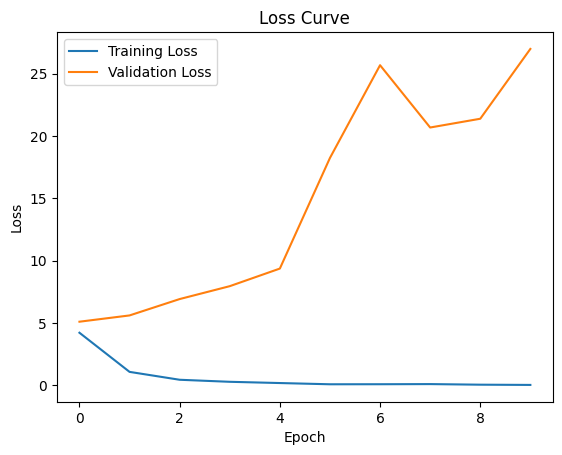

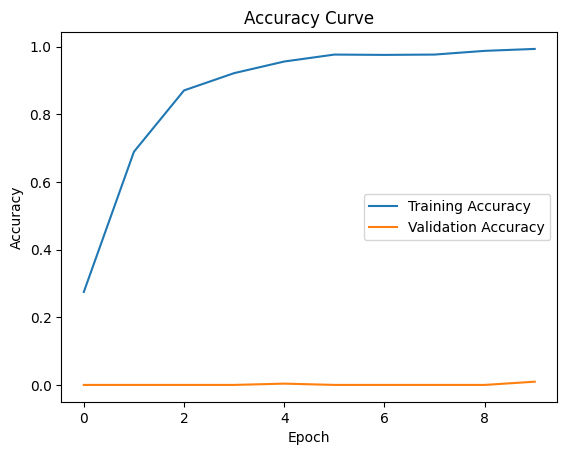

In [23]:
import matplotlib.pyplot as plt

# 获取训练过程中的损失和准确率历史记录
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 绘制损失曲线
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# 绘制准确率曲线
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

# 预测类别
y_pred = resnet_model.predict(X_input)
y_pred_classes = np.argmax(y_pred, axis=1)

# 计算混淆矩阵
confusion_mat = confusion_matrix(y, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

# 分类报告
class_report = classification_report(y, y_pred_classes)
print("Classification Report:")
print(class_report)


82/82 [==============================] - 8s 84ms/step
Confusion Matrix:
[[118   0   0 ...   0   0   0]
 [  0 181   1 ...   0   0   0]
 [  0   0  49 ...   0   0   0]
 ...
 [  0   1   3 ...   0   0   0]
 [ 14   0   0 ...   0   0   0]
 [  0   8   2 ...   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.58      0.49       205
           2       0.79      0.96      0.87       188
           3       0.22      1.00      0.36        49
           4       0.80      0.21      0.33        19
           6       1.00      0.78      0.88         9
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        24
           9       1.00      0.07      0.13        28
          10       0.96      0.46      0.63        56
          12       0.49      1.00      0.66        23
          15       0.62      0.83      0.71         6
          16       0.15      1.00      0.26        39
          

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
